In [1]:
import sys
sys.path.append("../")
from analysis import System as syst
import matplotlib.pyplot as plt
import numpy as np

ImportError: cannot import name 'simps' from 'scipy.integrate' (/home/fat-aunt-betty/venv/lib/python3.10/site-packages/scipy/integrate/__init__.py)

In [5]:
s = syst("sagnac", ["../../data/20240708/cage-pos" + str(x + 1) + "/iter_0.tdms" for x in range(12)], channel = "Y")

In [7]:
for x in range(12):
    s.set_data(ind = x)

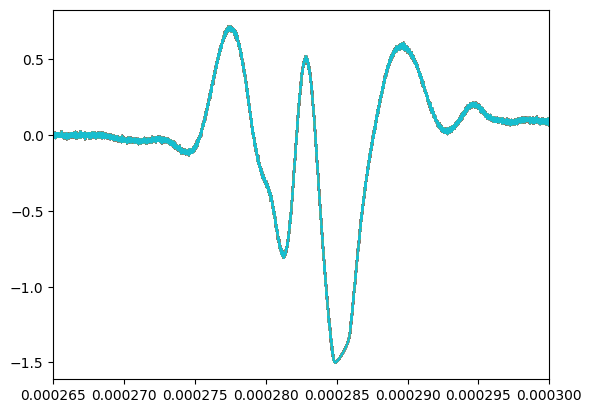

In [19]:
s.set_data(ind = 0)
s.get_data()[0].apply("calibrate", cal = -1, inplace = True)
for c in range(len(s.get_data()[0].collection[1:])):
    plt.plot(s.get_data()[0].collection[1].t, s.get_data()[0].collection[1].x)
plt.xlim(0.000265, 0.0003)
plt.show()